# Forest fire model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import plotly.express as px

sns.set(rc={"figure.figsize": (20,10)})

In [2]:
fire_data = pd.read_csv("https://raw.githubusercontent.com/shaq31415926/tub_advanced_ds/main/data/algerian_forest_fires.csv")

## EDA

In [29]:
class EDA:
    def __init__(self, csv_file):
        self.target_type = None
        self.target_var = None
        self.df = pd.read_csv(csv_file)
        self.rows = self.df.shape[0]
        self.cols = self.df.shape[1]

    def __repr__(self):
        return f"A dataframe with {self.rows} rows and {self.cols} columns"

    def summary(self):
        self.print_header("Info")
        print(self.df.info())

        self.print_header("Sample rows")
        print(self.df.sample(10))

        self.print_header("Description")
        print(self.df.describe())
        
        self.print_header("Standard deviation")
        print(self.df.std())
    
    def info(self):
        self.df.info()

    def describe(self, include="all"):
        self.df.describe(datetime_is_numeric=True, include=include)

    def std(self):
        self.df.std()

    def print_header(self, title, sep="__", n_sep=15):
        return print(f'{sep * n_sep} {title} {sep * n_sep} \n')

    def target(self, target_name: str, target_type:str) -> None:
        """
        Sets the target variable
        :param target_name: Name of target variable in dataset
        :param target_type: Type of variable cat, contin
        :return:
        """
        try:
            self.target_var = self.df[target_name]
            self.target_type = target_type
        except KeyError:
            raise KeyError("Target variable not in Dataset")

    def plot_target(self):
        """
        Plots distribution of the target variable
        :return:
        """
        if self.target_type == "cat":
            self.target_var.value_counts().plot(kind="bar")
        else:
            self.target_var.hist()

    def num_cats(self):
        self.df.select_dtypes("object").nunique(dropna=False).sort_values(ascending=False)

    def remove_cats(self, n_cats):
        num_cats = self.num_cats()

        print(num_cats > n_cats)
    # @target.setter
    # def target(self, target_name):
    #     self.target = target_name
    #
    def identify_missing_data(self):
        """
        This function is used to identify missing data

        @param df pandas DataFrame

        @return a DataFrame with the percentage of missing data for every feature and the data types
        """

        percent_missing = self.df.isnull().mean()

        missing_value_df = pd.DataFrame(percent_missing).reset_index()  # convert to DataFrame
        missing_value_df = missing_value_df.rename(columns={"index": "feature",
                                                            0: "percent_missing"})  # rename columns

        missing_value_df = missing_value_df.sort_values(by=['percent_missing'], ascending=False)  # sort the values

        data_types_df = pd.DataFrame(self.df.dtypes).reset_index().rename(columns={"index": "feature",
                                                                              0: "data_type"})  # rename columns

        missing_value_df = missing_value_df.merge(data_types_df, on="feature")  # join the dataframe with datatype

        missing_value_df.percent_missing = round(missing_value_df.percent_missing * 100, 2)  # format the percent_missing

        return missing_value_df




In [30]:
test = EDA("https://raw.githubusercontent.com/shaq31415926/tub_advanced_ds/main/data/algerian_forest_fires.csv")
test.target("FWI", "reg")

In [32]:
test.remove_cats(10)

TypeError: '>' not supported between instances of 'NoneType' and 'int'

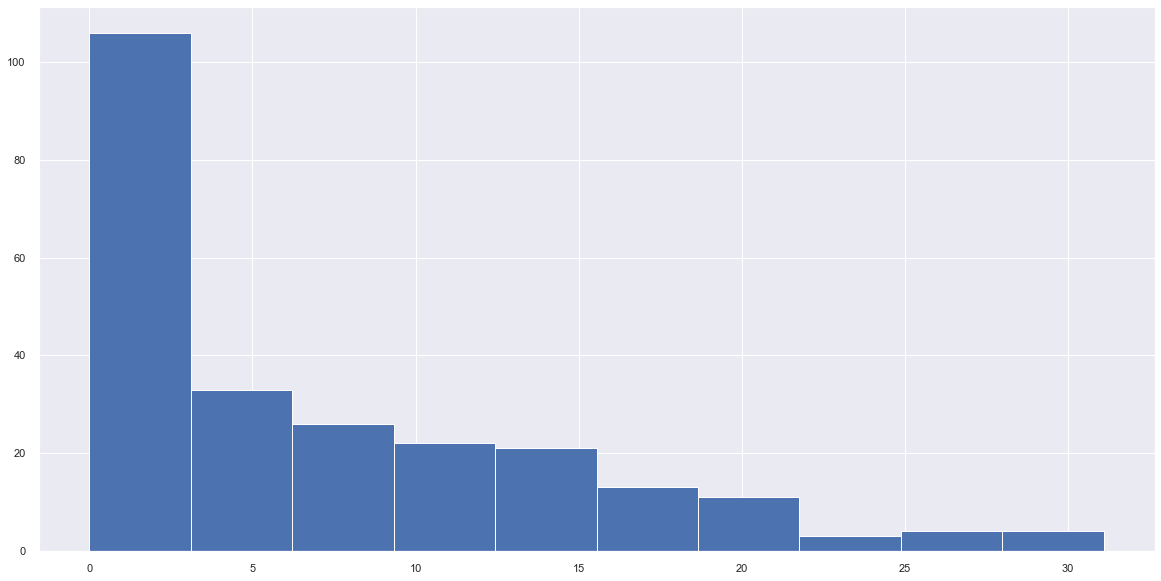

In [25]:
test.plot_target()

In [23]:
test.summary()

______________________________ Info ______________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB
None
______________________________ Sample rows ______________________________ 

     day  

C:\Users\terje\AppData\Local\Temp\ipykernel_12408\394807670.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(self.df.std())


In [ ]:
class EDA:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self.rows = self.df.shape[0]
        self.cols = self.df.shape[1]

    def __repr__(self):
        return f"A dataframe with {self.rows} rows and {self.cols} columns"

    def summary(self):
        print(self.df.info())
        print(self.df.describe())
        print(self.df.std())
    
    def info(self):
        self.df.info()

    def describe(self, include="all"):
        self.df.describe(datetime_is_numeric=True, include=include)

    def std(self):
        self.df.std()

    


    



In [ ]:
test = EDA("https://raw.githubusercontent.com/shaq31415926/tub_advanced_ds/main/data/algerian_forest_fires.csv")

In [ ]:
test.summary()

In [ ]:
fire_data.info()

In [ ]:
fire_data.describe(datetime_is_numeric=True, include="all")

In [ ]:
fire_data.sample(10)

In [ ]:
fire_data.std()

In [ ]:
fire_data_clean = fire_data.drop(columns="year")

### Exploring target

In [ ]:
target = fire_data_clean["Classes"]

target.value_counts(normalize=True)

In [ ]:
px.bar(target.value_counts())

In [ ]:
fire_data_clean.hist(figsize=(20,10))

In [ ]:
corrs = fire_data_clean.corr()
sns.heatmap(corrs, annot=True,
            linewidth=0.75,
            linecolor='black',
            cbar=False,
            # cbar_kws={"orientation": "horizontal"},
            vmin=-1,
            vmax=1,
            annot_kws={"size": 12, "color": "black"})
plt.tick_params(labelsize=14, rotation=45)
plt.title("Correlation Plot", size=14);

In [71]:
def drop_correlated(df: pd.DataFrame, threshold: float = 0.6) -> pd.DataFrame:
    df = df.copy()
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Removed the following columns {','.join(to_drop)} due to high correlation")

    return df.drop(columns=to_drop)

In [76]:
fire_data.corr().shape

(13, 13)

In [72]:
drop_correlated(fire_data)

Removed the following columns RH,FFMC,DMC,DC,ISI,BUI,FWI due to high correlation


,day,month,year,Temperature,Ws,Rain,Classes
0,1,6,2012,29,18,0.0,not fire
1,2,6,2012,29,13,1.3,not fire
2,3,6,2012,26,22,13.1,not fire
3,4,6,2012,25,13,2.5,not fire
4,5,6,2012,27,16,0.0,not fire
...,...,...,...,...,...,...,...
238,26,9,2012,30,14,0.0,fire
239,27,9,2012,28,15,4.4,not fire
240,28,9,2012,27,29,0.5,not fire
241,29,9,2012,24,18,0.1,not fire
